In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/IMDb Movies India.csv.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None

First 5 rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                     

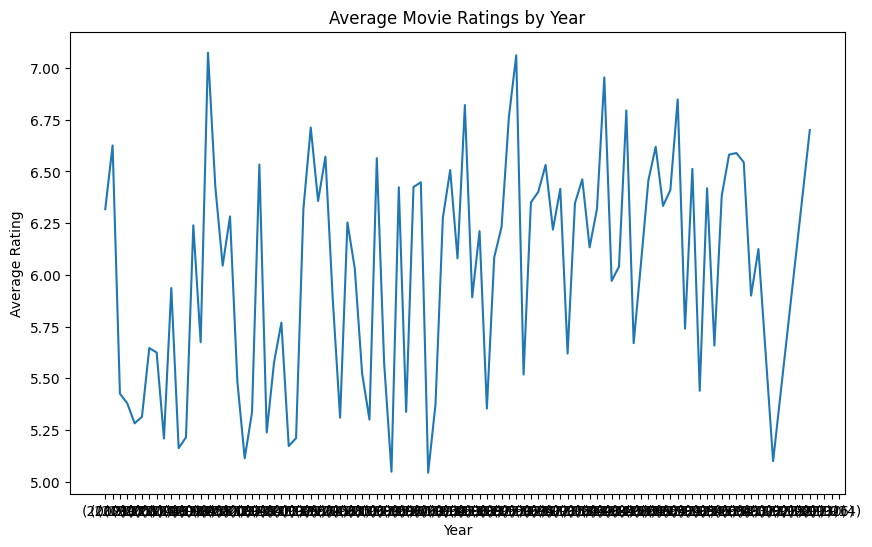

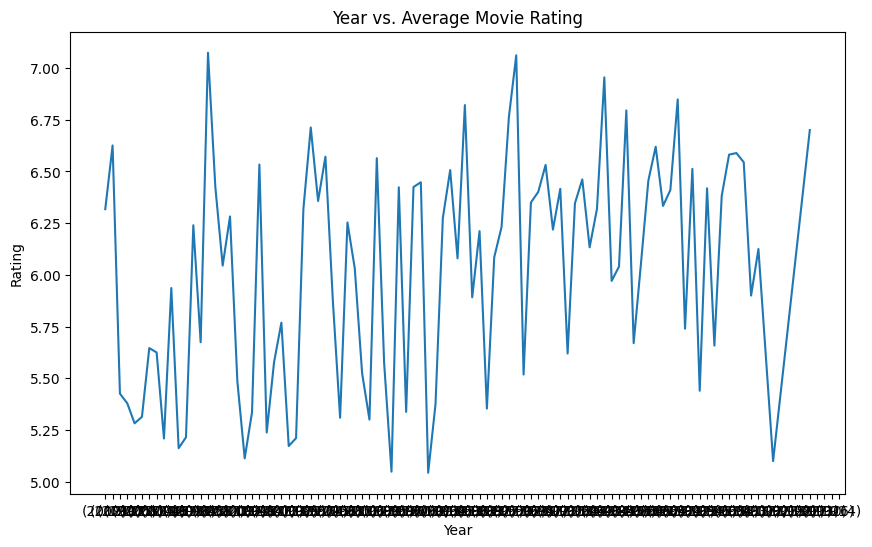


Top 10 Movies by Rating:
       Rating    Year
8339     10.0  (2020)
5410      9.7  (2021)
2563      9.6  (2020)
5077      9.4  (2019)
6852      9.4  (2021)
11704     9.4  (2017)
14222     9.4  (2020)
1314      9.3  (2018)
1729      9.3  (2021)
5125      9.3  (2019)


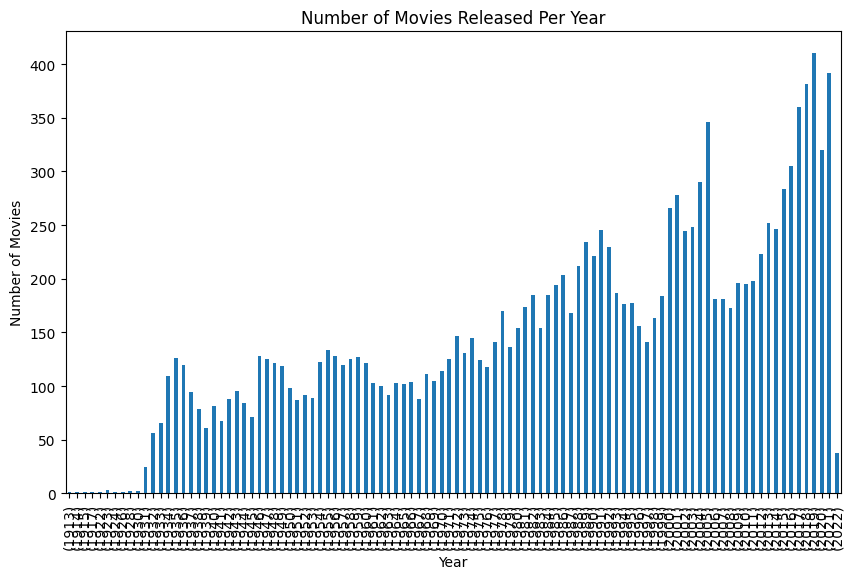


Movies with the Most Votes:
       Votes  Rating
12569  999.0     7.1
5663   998.0     6.8
7930   996.0     6.0
3961   986.0     5.2
6241   985.0     7.4
7083   985.0     8.1
9822   984.0     7.5
12     983.0     6.5
2612   982.0     6.0
2453   981.0     5.0

Top 10 Directors with Most Movies:
Director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
Nanabhai Bhatt      46
Dhirubhai Desai     46
Mohammed Hussain    44
B.R. Ishara         44
David Dhawan        43
Name: count, dtype: int64


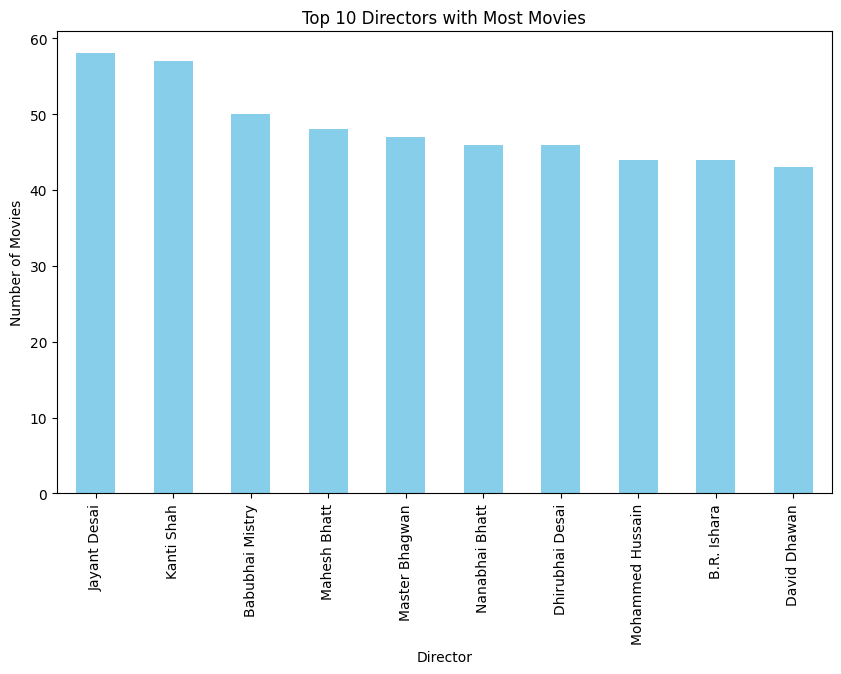


Top 10 Actors by Number of Appearances:
Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      127
Rajesh Khanna         122
Dev Anand              93
Shashi Kapoor          91
Akshay Kumar           86
Sanjeev Kumar          83
Name: count, dtype: int64


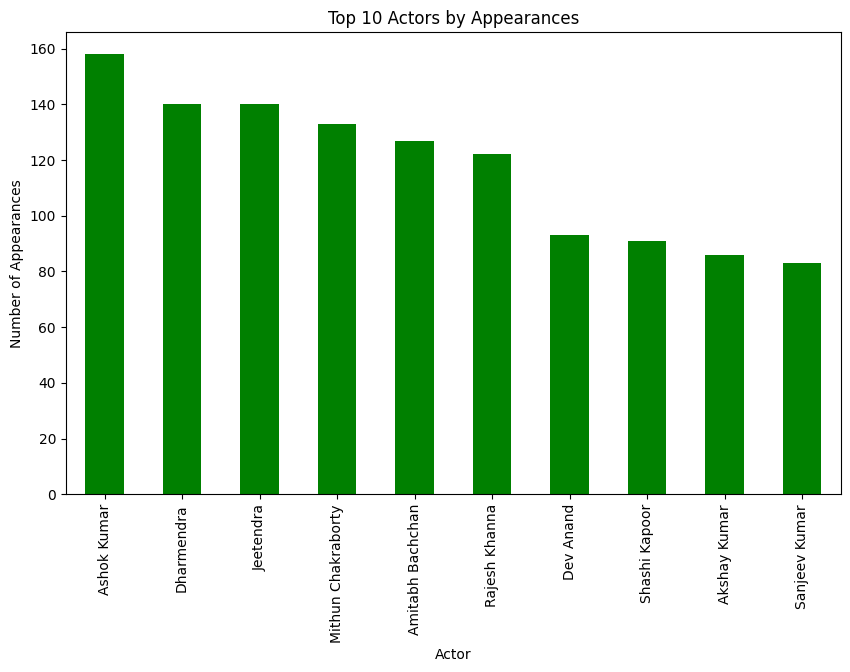

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#suppress the Future Warning
warnings.filterwarnings ('ignore',category=FutureWarning)
# Load the dataset
# Replace 'file_path' with the actual path to your dataset
file_path = "/content/IMDb Movies India.csv.zip"
df = pd.read_csv(file_path,encoding ='latin1')
df=df.replace([float('inf'),float('-inf')],pd.NA)

# View basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Handle missing values (if necessary)
df=df.dropna(subset=['Year']) # Drop rows with missing values
print("\nAfter handling missing values:")
print(df.info())

# Analysis 1: Year with the best ratings
best_rated_year = df.groupby('Year')['Rating'].mean().idxmax()
print(f"\nYear with the best average rating: {best_rated_year}")

# Visualization: Ratings by Year
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating', errorbar=None)
plt.title('Average Movie Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Analysis 2: Does length of the movie impact ratings?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating',errorbar=None)
plt.title('Year vs. Average Movie Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

# Analysis 3: Top 10 movies by rating
top_10_movies = df.nlargest(10, 'Rating')[[ 'Rating', 'Year']]
print("\nTop 10 Movies by Rating:")
print(top_10_movies)

# Analysis 4: Number of movies released per year
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Analysis 5: Movies with the most votes and their performance
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
most_votes = df.nlargest(10, 'Votes')[[ 'Votes', 'Rating']]
print("\nMovies with the Most Votes:")
print(most_votes)

# Additional Trend: Directors with the most movies
top_directors = df['Director'].value_counts().head(10)
print("\nTop 10 Directors with Most Movies:")
print(top_directors)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

# Additional Trend: Top actors by appearances
top_actors = df['Actor 1'].str.split(', ', expand=True).stack().value_counts().head(10)
print("\nTop 10 Actors by Number of Appearances:")
print(top_actors)

plt.figure(figsize=(10, 6))
top_actors.plot(kind='bar', color='green')
plt.title('Top 10 Actors by Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.show()